<a href="https://colab.research.google.com/github/MoizAhmed2517/ANN-Classification_FashionMNIST/blob/main/Satellite_Remote_Sensing_images_Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting Drive settings

In [2]:
!pip install patchify

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd drive/MyDrive/ColabNotebooks

/content/drive/MyDrive/ColabNotebooks


### Setup datapath

In [23]:
import os
import cv2
import random
from PIL import Image
import numpy as np
from patchify import patchify, unpatchify
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [19]:
def get_images(extension):
  folder = 'satellite_imagery_data'
  images = []
  for path, dir, files in os.walk(folder):
    for file in files:
      if file.lower().endswith(extension):
        images.append(os.path.join(path, file))
  return images

images = get_images('.png')

In [ ]:
## Padding technique

# Read the image (replace with your image)
image = cv2.imread(images[5], 1)
print("Original Image Shape:", image.shape)

image_patch_size = 128

# Calculate the required padding dimensions to make the image size divisible by patch size
pad_x = (image_patch_size - image.shape[1] % image_patch_size) % image_patch_size
pad_y = (image_patch_size - image.shape[0] % image_patch_size) % image_patch_size

# Pad the image (adding padding to the right and bottom to match patch size)
image_padded = cv2.copyMakeBorder(image, 0, pad_y, 0, pad_x, cv2.BORDER_CONSTANT, value=(246, 41, 132))

print("Padded Image Shape:", image_padded.shape)

# Patchify the image
image_patches = patchify(image_padded, (image_patch_size, image_patch_size, 3), step=image_patch_size)
print("Image Patches Shape:", image_patches.shape)

# Loop through the patches and display them
for i in range(image_patches.shape[0]):
    for j in range(image_patches.shape[1]):
        # Extract a single patch
        single_patch_img = image_patches[i, j, 0, :, :, :]  # Remove the extra dimension
        print("Patch Shape:", single_patch_img.shape)

        # Display the patch
        cv2_imshow(single_patch_img)

In [11]:
mask_data = []
minmax = MinMaxScaler()
# Cropping technique
image = cv2.imread(images[5], 1)
print("Original Image Shape:", image.shape)
image_patch_size = 256

size_x = (image.shape[1] // image_patch_size) * image_patch_size
size_y = (image.shape[0] // image_patch_size) * image_patch_size

image = Image.fromarray(image)
image = image.crop((0, 0, size_x, size_y))
image = np.array(image)
print("Crop Image shape:", image.shape)
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
print("Image patches shape:", image_patches.shape)

# getting patch of images:

for i in range(image_patches.shape[0]):
  for j in range(image_patches.shape[1]):
    single_patch_img = image_patches[i, j, :, :]
    print(single_patch_img[0].shape)
    img_patch = single_patch_img[0]
    print("Normalized Image:", img_patch.shape)

Original Image Shape: (544, 509, 3)
Crop Image shape: (512, 256, 3)
Image patches shape: (2, 1, 1, 256, 256, 3)
(256, 256, 3)
Normalized Image: (256, 256, 3)
(256, 256, 3)
Normalized Image: (256, 256, 3)


In [14]:
def preprocess_images(images, train_dataset=True):
  image_patch_size = 256
  dataset = []
  minmax = MinMaxScaler()
  for img in images:
    image = cv2.imread(img, 1)
    if not train_dataset:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    size_x = (image.shape[1] // image_patch_size) * image_patch_size
    size_y = (image.shape[0] // image_patch_size) * image_patch_size
    image = Image.fromarray(image)
    image = image.crop((0, 0, size_x, size_y))
    image = np.array(image)
    image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
    for i in range(image_patches.shape[0]):
      for j in range(image_patches.shape[1]):
        single_patch_img = image_patches[i, j, :, :]
        if train_dataset:
          img_patch = minmax.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
          img_patch = img_patch[0]
        else:
          img_patch = single_patch_img[0]
        dataset.append(img_patch)
  return dataset

In [18]:
images = get_images('.jpg')
image = preprocess_images(images)
masks = get_images('.png')
mask = preprocess_images(masks, False)

In [17]:
len(image), len(mask)

(1305, 1305)

In [24]:
def random_image_comparison_plot(image, mask):
  id = random.randint(0, len(image))
  plt.figure(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(image[id])
  plt.subplot(1, 2, 2)
  plt.imshow(mask[id])

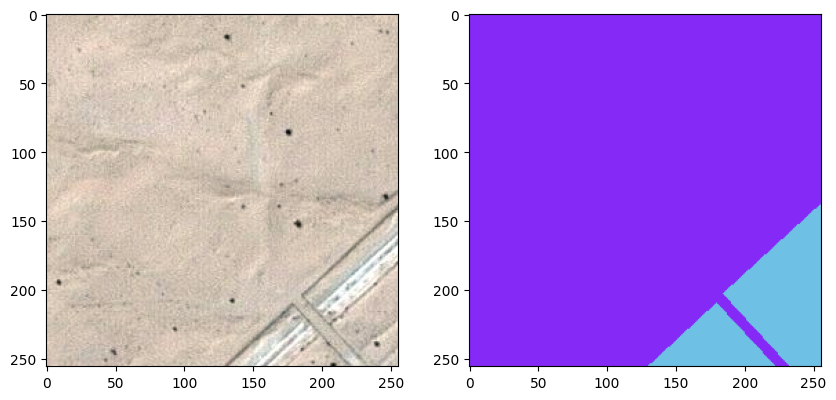

In [43]:
random_image_comparison_plot(image, mask)